In [24]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from scipy.stats import skewnorm
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

Creating a Train Test Split of our Dataset.

In [25]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [26]:

# Can split data in X and y first, if you want
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train, test = train_test_split(df, test_size=0.2, random_state=42)

Stratification by Regionname

In [27]:
df['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217084
Eastern Metropolitan          0.108321
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003903
Northern Victoria             0.003019
Western Victoria              0.002356
Name: proportion, dtype: float64

In [28]:
train['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.345913
Northern Metropolitan         0.287095
Western Metropolitan          0.216679
Eastern Metropolitan          0.107603
South-Eastern Metropolitan    0.033689
Eastern Victoria              0.003406
Northern Victoria             0.003130
Western Victoria              0.002485
Name: proportion, dtype: float64

In [29]:
test['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.344993
Northern Metropolitan         0.283873
Western Metropolitan          0.218704
Eastern Metropolitan          0.111193
South-Eastern Metropolitan    0.030928
Eastern Victoria              0.005891
Northern Victoria             0.002577
Western Victoria              0.001841
Name: proportion, dtype: float64

In [30]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Regionname'])

In [31]:
df['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217084
Eastern Metropolitan          0.108321
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003903
Northern Victoria             0.003019
Western Victoria              0.002356
Name: proportion, dtype: float64

In [32]:
train['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217047
Eastern Metropolitan          0.108339
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003866
Northern Victoria             0.003038
Western Victoria              0.002393
Name: proportion, dtype: float64

In [33]:
test['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217231
Eastern Metropolitan          0.108247
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.004050
Northern Victoria             0.002946
Western Victoria              0.002209
Name: proportion, dtype: float64

In [34]:
def compare_strat(df, v_name):
    train, _ = train_test_split(df, test_size=0.2, random_state=42)
    train_strat, _ = train_test_split(df, test_size=0.2, random_state=42, stratify=df[v_name])
    combined = pd.DataFrame({'overall': df[v_name].value_counts(normalize=True)*100,
                            'stratified': train_strat[v_name].value_counts(normalize=True)*100,
                            'random': train[v_name].value_counts(normalize=True)*100}).reset_index()
    combined['strat_error'] = (combined['stratified'] /
                            combined['overall'] - 1)*100
    combined['random_error'] = (combined['random'] / combined['overall'] - 1)*100
    return combined

compare_strat(df, 'Regionname')

,Regionname,overall,stratified,random,strat_error,random_error
0,Southern Metropolitan,34.572901,34.572901,34.591311,0.000000,0.053248
1,Northern Metropolitan,28.645066,28.645066,28.709499,0.000000,0.224936
2,Western Metropolitan,21.708395,21.704713,21.667894,-0.016961,-0.186567
3,Eastern Metropolitan,10.832106,10.833947,10.760309,0.016995,-0.662814
4,South-Eastern Metropolitan,3.313697,3.313697,3.368925,0.000000,1.666667
5,Eastern Victoria,0.390280,0.386598,0.340574,-0.943396,-12.735849
6,Northern Victoria,0.301915,0.303756,0.312960,0.609756,3.658537
7,Western Victoria,0.235641,0.239323,0.248527,1.562500,5.468750


Under Sampling for the Majority Class.

In [35]:
# Lets create an unbalanced data set
train['target'] = train['Regionname'].apply(lambda x:'eastern_metro' if x=='Eastern Metropolitan' else 'not_eastern_metro')
train['target'].value_counts(normalize=True)

target
not_eastern_metro    0.891661
eastern_metro        0.108339
Name: proportion, dtype: float64

In [36]:
train['target'].value_counts()

target
not_eastern_metro    9687
eastern_metro        1177
Name: count, dtype: int64

In [37]:
undersampler = RandomUnderSampler(random_state=42)
train_undersampled, target_undersampled = undersampler.fit_resample(train, train['target'])
train_undersampled['target'].value_counts()

target
eastern_metro        1177
not_eastern_metro    1177
Name: count, dtype: int64

Oversampling for the Minority Class.

In [38]:
oversampler = RandomOverSampler(random_state=42)
train_oversampled, target_oversampled = oversampler.fit_resample(train, train['target'])
train_oversampled['target'].value_counts()

target
not_eastern_metro    9687
eastern_metro        9687
Name: count, dtype: int64

In [39]:
# Can specify the proportion as well
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
train_oversampled, target_oversampled = oversampler.fit_resample(train, train['target'])
train_oversampled['target'].value_counts()

target
not_eastern_metro    9687
eastern_metro        4843
Name: count, dtype: int64

Trying for MultiClass.

In [40]:
train['Regionname'].value_counts()

Regionname
Southern Metropolitan         3756
Northern Metropolitan         3112
Western Metropolitan          2358
Eastern Metropolitan          1177
South-Eastern Metropolitan     360
Eastern Victoria                42
Northern Victoria               33
Western Victoria                26
Name: count, dtype: int64

In [41]:
oversampler = RandomOverSampler(random_state=42)
train_oversampled, target_oversampled = oversampler.fit_resample(train, train['Regionname'])
train_oversampled['Regionname'].value_counts()

Regionname
Northern Metropolitan         3756
Western Metropolitan          3756
Southern Metropolitan         3756
Eastern Metropolitan          3756
Eastern Victoria              3756
South-Eastern Metropolitan    3756
Northern Victoria             3756
Western Victoria              3756
Name: count, dtype: int64

In [42]:
undersampler = RandomUnderSampler(random_state=42)
train_undersampled, target_undersampled = undersampler.fit_resample(train, train['Regionname'])
train_undersampled['Regionname'].value_counts()

Regionname
Eastern Metropolitan          26
Eastern Victoria              26
Northern Metropolitan         26
Northern Victoria             26
South-Eastern Metropolitan    26
Southern Metropolitan         26
Western Metropolitan          26
Western Victoria              26
Name: count, dtype: int64

SMOTE (Synthetic Minority Oversampling Technique)

In [43]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

df = pd.DataFrame(X, columns=['A', 'B'])
df['target'] = y
df.head()

,A,B,target
0,0.662420,-0.763477,2
1,-0.201381,-2.469794,2
2,1.208045,-0.332895,2
3,1.375456,0.974206,2
4,0.215885,-1.556261,2


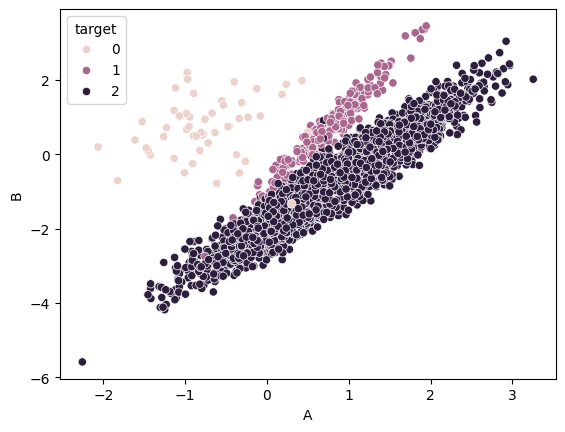

In [44]:
sns.scatterplot(df, x='A', y='B', hue='target')
plt.show()

In [45]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
df = pd.DataFrame(X_resampled, columns=['A', 'B'])
df['target'] = y_resampled

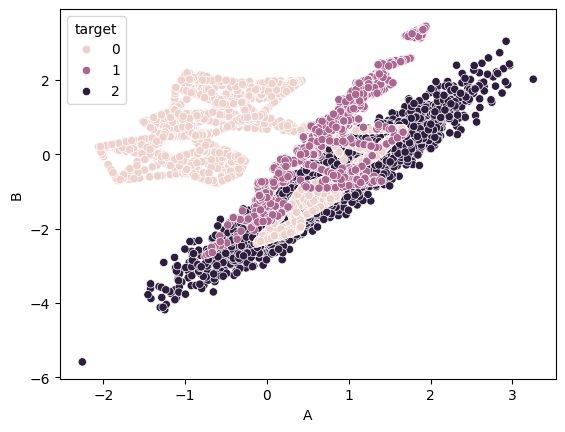

In [46]:
sns.scatterplot(df, x='A', y='B', hue='target')
plt.show()

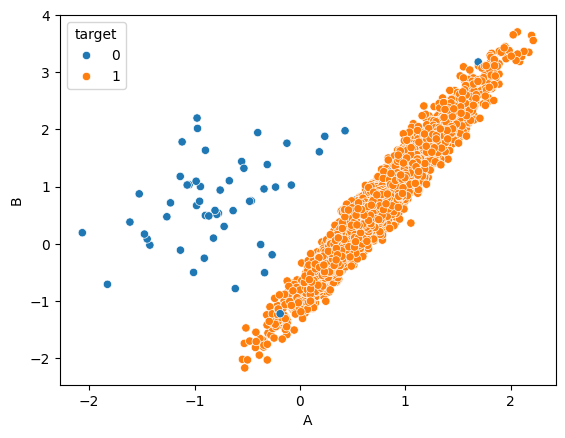

In [47]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.99],
                           class_sep=0.8, random_state=0)
df = pd.DataFrame(X, columns=['A', 'B'])
df['target'] = y
sns.scatterplot(df, x='A', y='B', hue='target')
plt.show()

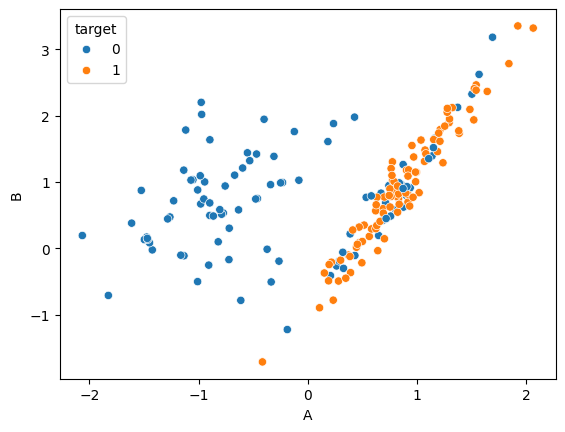

In [48]:
under_X, under_y = RandomUnderSampler(sampling_strategy=0.8).fit_resample(X, y)
smote_X, smote_y = SMOTE().fit_resample(under_X, under_y)
df = pd.DataFrame(smote_X, columns=['A', 'B'])
df['target'] = smote_y
sns.scatterplot(df, x='A', y='B', hue='target')
plt.show()

Checking for Data Quality and Errors.

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 2004 to 2781
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Price          10864 non-null  float64
 5   Method         10864 non-null  object 
 6   SellerG        10864 non-null  object 
 7   Date           10864 non-null  object 
 8   Distance       10864 non-null  float64
 9   Postcode       10864 non-null  float64
 10  Bedroom2       10864 non-null  float64
 11  Bathroom       10864 non-null  float64
 12  Car            10810 non-null  float64
 13  Landsize       10864 non-null  float64
 14  BuildingArea   5671 non-null   float64
 15  YearBuilt      6526 non-null   float64
 16  CouncilArea    9808 non-null   object 
 17  Lattitude      10864 non-null  float64
 18  Longtitud

In [50]:
train.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,10864.000000,1.086400e+04,10864.000000,10864.000000,10864.000000,10864.000000,10810.000000,10864.000000,5671.000000,6526.000000,10864.000000,10864.000000,10864.000000
mean,2.936487,1.076284e+06,10.111359,3105.276878,2.912831,1.531480,1.610546,515.996502,153.728096,1964.349065,-37.809360,144.994930,7475.049061
std,0.958216,6.403104e+05,5.847678,90.830218,0.972249,0.691956,0.961099,1127.660036,603.479157,37.569089,0.078950,0.103618,4406.332145
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,175.000000,92.000000,1940.000000,-37.856800,144.929923,4380.000000
50%,3.000000,9.020000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802700,145.000200,6567.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,174.000000,1999.000000,-37.756707,145.057300,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,44500.000000,44515.000000,2017.000000,-37.453920,145.526350,21650.000000


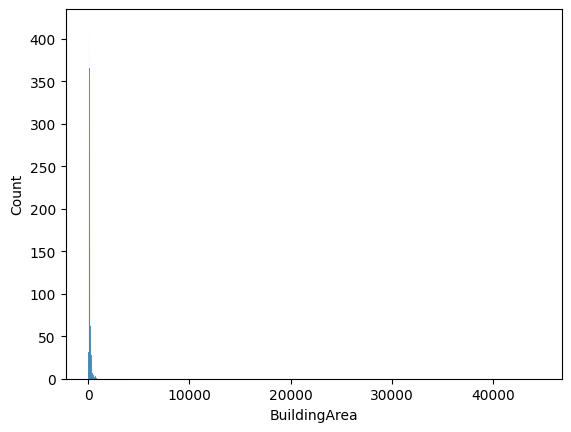

In [51]:
sns.histplot(train, x='BuildingArea')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


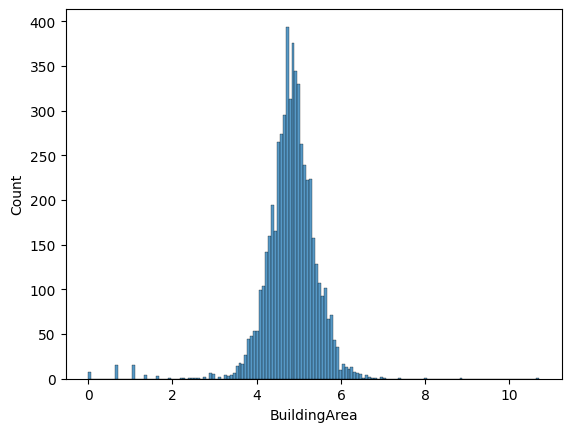

In [52]:
sns.histplot(np.log(train['BuildingArea']))
plt.show()

In [53]:
train['FilledBuildingArea'] = train['BuildingArea'].fillna(train['BuildingArea'].median())
train['LogFilledBuildingArea'] = np.log(train['BuildingArea'].fillna(train['BuildingArea'].median()))
train['ba_missing'] = pd.isna(train['BuildingArea'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


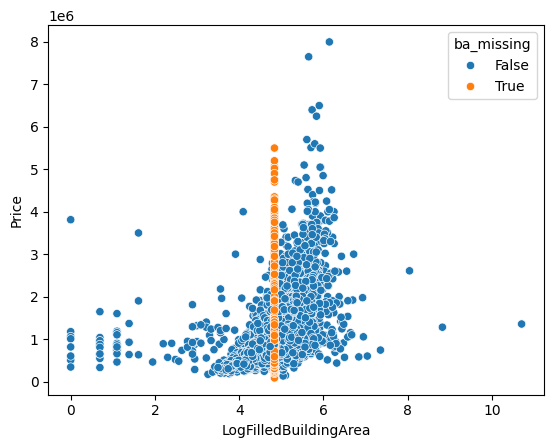

In [54]:
sns.scatterplot(train, x='LogFilledBuildingArea', y='Price', hue='ba_missing')
plt.show()

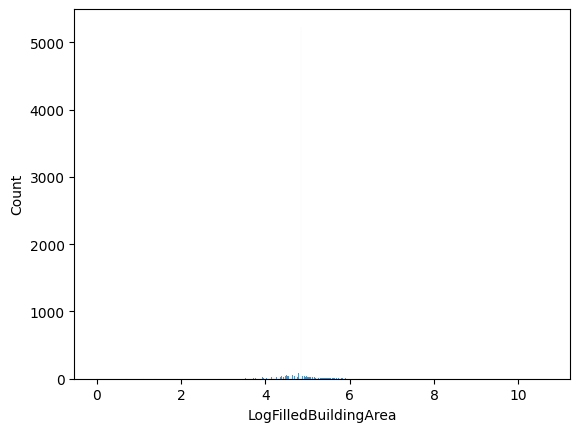

In [55]:
sns.histplot(train['LogFilledBuildingArea'])
plt.show()

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 2004 to 2781
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Suburb                 10864 non-null  object 
 1   Address                10864 non-null  object 
 2   Rooms                  10864 non-null  int64  
 3   Type                   10864 non-null  object 
 4   Price                  10864 non-null  float64
 5   Method                 10864 non-null  object 
 6   SellerG                10864 non-null  object 
 7   Date                   10864 non-null  object 
 8   Distance               10864 non-null  float64
 9   Postcode               10864 non-null  float64
 10  Bedroom2               10864 non-null  float64
 11  Bathroom               10864 non-null  float64
 12  Car                    10810 non-null  float64
 13  Landsize               10864 non-null  float64
 14  BuildingArea           5671 non-null   float64
 15  YearB

Dropping NA Values.

In [57]:
train.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 4954 entries, 143 to 3309
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Suburb                 4954 non-null   object 
 1   Address                4954 non-null   object 
 2   Rooms                  4954 non-null   int64  
 3   Type                   4954 non-null   object 
 4   Price                  4954 non-null   float64
 5   Method                 4954 non-null   object 
 6   SellerG                4954 non-null   object 
 7   Date                   4954 non-null   object 
 8   Distance               4954 non-null   float64
 9   Postcode               4954 non-null   float64
 10  Bedroom2               4954 non-null   float64
 11  Bathroom               4954 non-null   float64
 12  Car                    4954 non-null   float64
 13  Landsize               4954 non-null   float64
 14  BuildingArea           4954 non-null   float64
 15  YearBui

In [58]:
train.dropna(subset=['BuildingArea']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 5671 entries, 143 to 3309
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Suburb                 5671 non-null   object 
 1   Address                5671 non-null   object 
 2   Rooms                  5671 non-null   int64  
 3   Type                   5671 non-null   object 
 4   Price                  5671 non-null   float64
 5   Method                 5671 non-null   object 
 6   SellerG                5671 non-null   object 
 7   Date                   5671 non-null   object 
 8   Distance               5671 non-null   float64
 9   Postcode               5671 non-null   float64
 10  Bedroom2               5671 non-null   float64
 11  Bathroom               5671 non-null   float64
 12  Car                    5645 non-null   float64
 13  Landsize               5671 non-null   float64
 14  BuildingArea           5671 non-null   float64
 15  YearBui

Imputing the Median Value on the BuildingArea Variable.

In [59]:
#imputer = SimpleImputer(strategy='constant', fill_value=0)
imputer = SimpleImputer(strategy='median')
ba = train[['BuildingArea']]
imputer.fit(ba)
null_rows_idx = pd.isna(train[['BuildingArea']])
X_nulls = imputer.transform(train[['BuildingArea']])
X_nulls[null_rows_idx]

array([126., 126., 126., ..., 126., 126., 126.], shape=(5193,))

In [60]:
train['Suburb'].value_counts()

Suburb
Reservoir             301
Richmond              213
Bentleigh East        197
Brunswick             191
Essendon              181
                     ... 
Beaconsfield Upper      1
Mount Evelyn            1
Silvan                  1
Brookfield              1
North Warrandyte        1
Name: count, Length: 311, dtype: int64

In [61]:
train.drop(['LogFilledBuildingArea'], axis=1).describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,FilledBuildingArea
count,10864.000000,1.086400e+04,10864.000000,10864.000000,10864.000000,10864.000000,10810.000000,10864.000000,5671.000000,6526.000000,10864.000000,10864.000000,10864.000000,10864.000000
mean,2.936487,1.076284e+06,10.111359,3105.276878,2.912831,1.531480,1.610546,515.996502,153.728096,1964.349065,-37.809360,144.994930,7475.049061,140.474046
std,0.958216,6.403104e+05,5.847678,90.830218,0.972249,0.691956,0.961099,1127.660036,603.479157,37.569089,0.078950,0.103618,4406.332145,436.212364
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,0.000000
25%,2.000000,6.500000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,175.000000,92.000000,1940.000000,-37.856800,144.929923,4380.000000,123.000000
50%,3.000000,9.020000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802700,145.000200,6567.000000,126.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,174.000000,1999.000000,-37.756707,145.057300,10331.000000,129.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,44500.000000,44515.000000,2017.000000,-37.453920,145.526350,21650.000000,44515.000000


In [62]:
duplicates = train.duplicated(subset=['Address', 'Date'], keep=False)
train[duplicates].sort_values('Address')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,target,FilledBuildingArea,LogFilledBuildingArea,ba_missing
7769,Coburg,69 Victoria St,3,t,720000.0,PI,C21,29/04/2017,7.8,3058.0,...,2016.0,Moreland,-37.74240,144.95710,Northern Metropolitan,11204.0,not_eastern_metro,112.0,4.718499,False
7770,Coburg,69 Victoria St,3,t,720000.0,PI,Century,29/04/2017,7.8,3058.0,...,2016.0,Moreland,-37.74240,144.95710,Northern Metropolitan,11204.0,not_eastern_metro,112.0,4.718499,False
9948,Malvern East,8 Vickery St,4,h,3600000.0,S,Marshall,24/06/2017,8.4,3145.0,...,2015.0,Stonnington,-37.87421,145.04958,Southern Metropolitan,8801.0,not_eastern_metro,355.0,5.872118,False
9793,Bentleigh,8 Vickery St,5,h,1900000.0,VB,Buxton,24/06/2017,11.4,3204.0,...,NaN,Glen Eira,-37.91753,145.03907,Southern Metropolitan,6795.0,not_eastern_metro,126.0,4.836282,True


In [63]:
train.shape

(10864, 25)

In [64]:
train.drop_duplicates(subset=['Address']).shape

(10739, 25)

Exploratory Data Analysis (EDA)

Checking Data Types

In [65]:
train.dtypes

Suburb                    object
Address                   object
Rooms                      int64
Type                      object
Price                    float64
Method                    object
SellerG                   object
Date                      object
Distance                 float64
Postcode                 float64
Bedroom2                 float64
Bathroom                 float64
Car                      float64
Landsize                 float64
BuildingArea             float64
YearBuilt                float64
CouncilArea               object
Lattitude                float64
Longtitude               float64
Regionname                object
Propertycount            float64
target                    object
FilledBuildingArea       float64
LogFilledBuildingArea    float64
ba_missing                  bool
dtype: object

Checking Summary Statistics

In [66]:
train.describe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,FilledBuildingArea,LogFilledBuildingArea
count,10864.000000,1.086400e+04,10864.000000,10864.000000,10864.000000,10864.000000,10810.000000,10864.000000,5671.000000,6526.000000,10864.000000,10864.000000,10864.000000,10864.000000,1.086400e+04
mean,2.936487,1.076284e+06,10.111359,3105.276878,2.912831,1.531480,1.610546,515.996502,153.728096,1964.349065,-37.809360,144.994930,7475.049061,140.474046,-inf
std,0.958216,6.403104e+05,5.847678,90.830218,0.972249,0.691956,0.961099,1127.660036,603.479157,37.569089,0.078950,0.103618,4406.332145,436.212364,NaN
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,0.000000,-inf
25%,2.000000,6.500000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,175.000000,92.000000,1940.000000,-37.856800,144.929923,4380.000000,123.000000,4.812184e+00
50%,3.000000,9.020000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802700,145.000200,6567.000000,126.000000,4.836282e+00
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,174.000000,1999.000000,-37.756707,145.057300,10331.000000,129.000000,4.859812e+00
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,44500.000000,44515.000000,2017.000000,-37.453920,145.526350,21650.000000,44515.000000,1.070358e+01


Viewing Correlations

In [67]:
train.corr(numeric_only=True)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,FilledBuildingArea,LogFilledBuildingArea,ba_missing
Rooms,1.000000,0.505278,0.293882,0.060162,0.941070,0.595854,0.412918,0.090719,0.120455,-0.066724,0.008317,0.099307,-0.079740,0.090172,0.451998,-0.043306
Price,0.505278,1.000000,-0.166355,0.105761,0.480361,0.472147,0.231653,0.055156,0.085582,-0.324386,-0.210888,0.200844,-0.040680,0.065415,0.364374,-0.004699
Distance,0.293882,-0.166355,1.000000,0.435737,0.293765,0.125075,0.267337,0.117442,0.107737,0.250893,-0.142012,0.238504,-0.052818,0.079694,0.160634,0.000921
Postcode,0.060162,0.105761,0.435737,1.000000,0.063863,0.112463,0.054812,0.074881,0.060635,0.036911,-0.414239,0.445577,0.066841,0.043902,0.057441,0.006361
Bedroom2,0.941070,0.480361,0.293765,0.063863,1.000000,0.585282,0.409580,0.089694,0.118748,-0.053514,0.010864,0.099390,-0.080172,0.087505,0.433439,-0.037971
Bathroom,0.595854,0.472147,0.125075,0.112463,0.585282,1.000000,0.325346,0.077876,0.106113,0.145864,-0.072509,0.113554,-0.047925,0.083246,0.367441,-0.099331
Car,0.412918,0.231653,0.267337,0.054812,0.409580,0.325346,1.000000,0.112632,0.097657,0.104978,0.003374,0.059208,-0.025187,0.069168,0.231082,0.002993
Landsize,0.090719,0.055156,0.117442,0.074881,0.089694,0.077876,0.112632,1.000000,0.514682,0.042953,0.034455,0.009970,-0.017330,0.371722,0.089895,0.017624
BuildingArea,0.120455,0.085582,0.107737,0.060635,0.118748,0.106113,0.097657,0.514682,1.000000,0.017864,0.051647,-0.030458,-0.028163,1.000000,0.252460,NaN
YearBuilt,-0.066724,-0.324386,0.250893,0.036911,-0.053514,0.145864,0.104978,0.042953,0.017864,1.000000,0.053467,-0.004407,0.009517,0.014402,-0.018638,0.027873


Boxplots

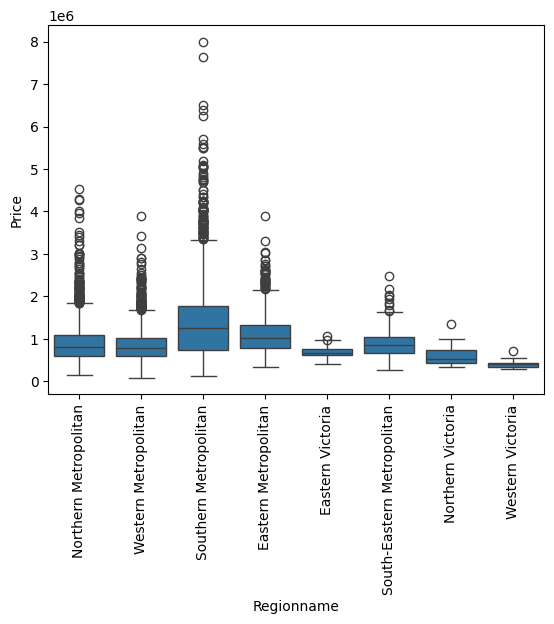

In [68]:
sns.boxplot(train, x='Regionname', y='Price')
plt.xticks(rotation=90)
plt.show()

Pairplots

In [69]:
sample, _ = train_test_split(train.iloc[:,0:10], train_size=0.10, random_state=42)
sample.shape

(1086, 10)

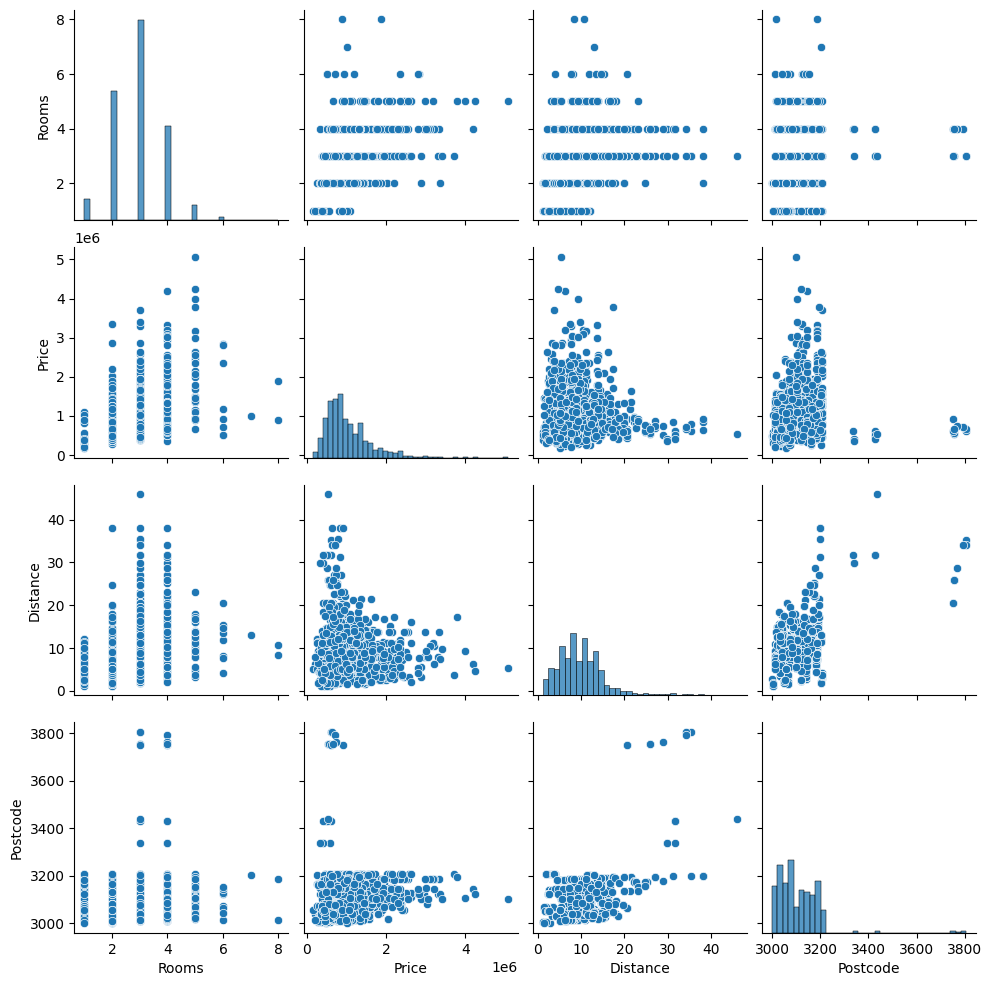

In [70]:
sns.pairplot(sample.select_dtypes(['float', 'int']))
plt.show()

Checking Skewness

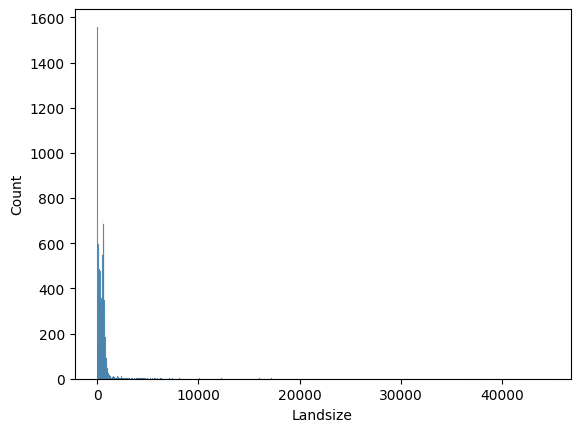

In [71]:
sns.histplot(train['Landsize'])
plt.show()

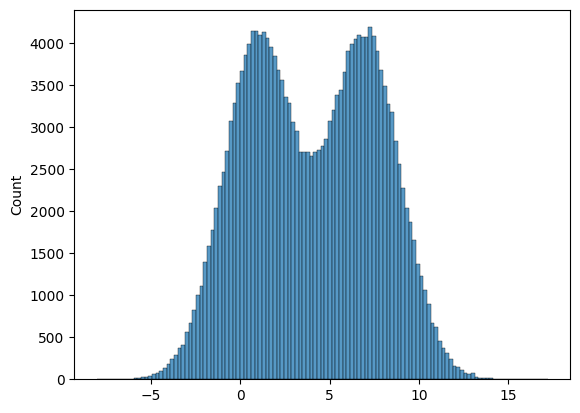

In [72]:
a = np.random.standard_normal(100000) * 2 + 7
b = np.random.standard_normal(100000) * 2 + 1
sns.histplot(np.concatenate([a,b]))
plt.show()

Feature Engeneering

Categorical Data

Ordinal Encoding

In [73]:
oe = OrdinalEncoder()
council_area_ordinal = oe.fit_transform(train[['CouncilArea']])
council_area_ordinal

array([[23.],
       [10.],
       [nan],
       ...,
       [ 6.],
       [ 0.],
       [ 2.]], shape=(10864, 1))

In [74]:
oe.categories_

[array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
        'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
        'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
        'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
        'Monash', 'Moonee Valley', 'Moorabool', 'Moreland', 'Nillumbik',
        'Port Phillip', 'Stonnington', 'Unavailable', 'Whitehorse',
        'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges', nan],
       dtype=object)]

One-hot Encoding

In [75]:
ohe = OneHotEncoder()
council_area_one_hot = ohe.fit_transform(train[['CouncilArea']])
council_area_one_hot.toarray().shape

(10864, 34)

In [76]:
df_output = pd.DataFrame(council_area_one_hot.toarray(), columns = ohe.categories_, index=train.index)
df_output

,Banyule,Bayside,Boroondara,Brimbank,Cardinia,Casey,Darebin,Frankston,Glen Eira,Greater Dandenong,...,Nillumbik,Port Phillip,Stonnington,Unavailable,Whitehorse,Whittlesea,Wyndham,Yarra,Yarra Ranges,NaN
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1171,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4396,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
ohe.get_feature_names_out()

array(['CouncilArea_Banyule', 'CouncilArea_Bayside',
       'CouncilArea_Boroondara', 'CouncilArea_Brimbank',
       'CouncilArea_Cardinia', 'CouncilArea_Casey', 'CouncilArea_Darebin',
       'CouncilArea_Frankston', 'CouncilArea_Glen Eira',
       'CouncilArea_Greater Dandenong', 'CouncilArea_Hobsons Bay',
       'CouncilArea_Hume', 'CouncilArea_Kingston', 'CouncilArea_Knox',
       'CouncilArea_Macedon Ranges', 'CouncilArea_Manningham',
       'CouncilArea_Maribyrnong', 'CouncilArea_Maroondah',
       'CouncilArea_Melbourne', 'CouncilArea_Melton',
       'CouncilArea_Monash', 'CouncilArea_Moonee Valley',
       'CouncilArea_Moorabool', 'CouncilArea_Moreland',
       'CouncilArea_Nillumbik', 'CouncilArea_Port Phillip',
       'CouncilArea_Stonnington', 'CouncilArea_Unavailable',
       'CouncilArea_Whitehorse', 'CouncilArea_Whittlesea',
       'CouncilArea_Wyndham', 'CouncilArea_Yarra',
       'CouncilArea_Yarra Ranges', 'CouncilArea_nan'], dtype=object)

Numeric Data

Transformation of Data

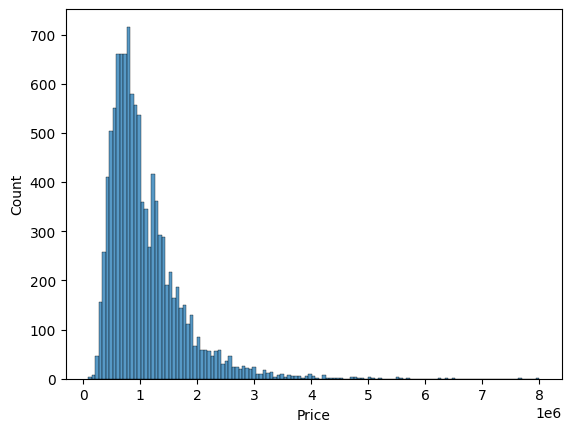

In [78]:
sns.histplot(train, x='Price')
plt.show()

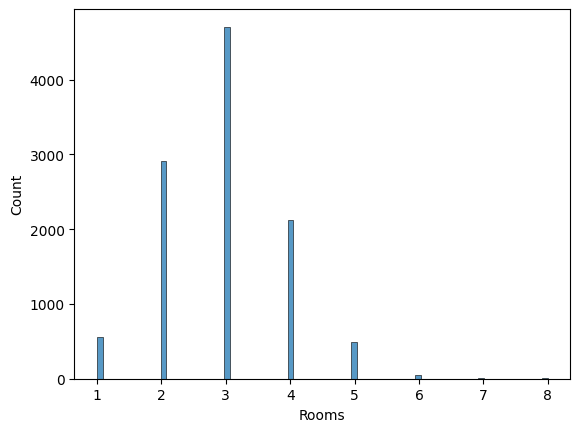

In [79]:
sns.histplot(train, x='Rooms')
plt.show()

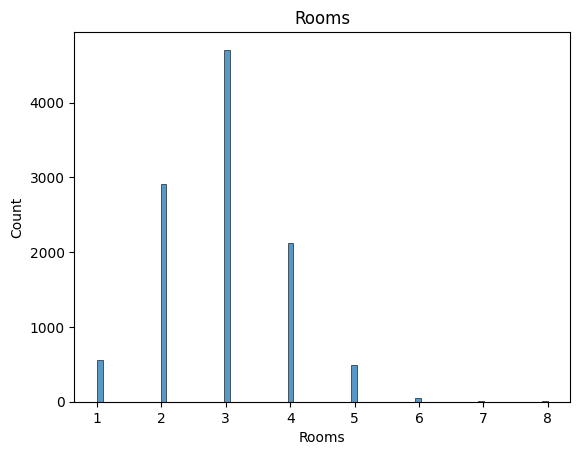

In [80]:
for c in train.select_dtypes(['int', 'float']).columns:
    if not 'Filled' in c:
        sns.histplot(train, x=c)
        plt.title(c)
        plt.show()
        break

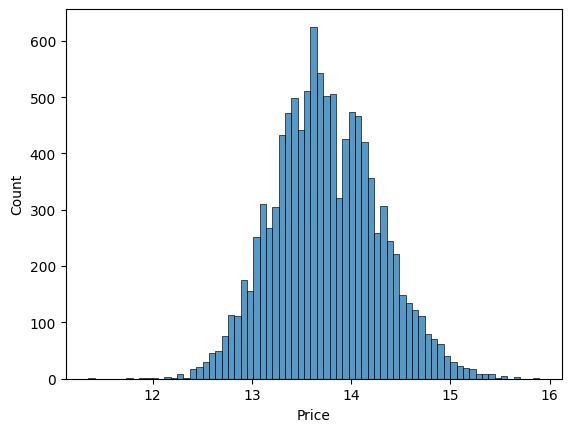

In [81]:
sns.histplot(np.log(train['Price']))
plt.show()

Outliers Solution

In [82]:
print(train.shape)
upper = train['BuildingArea'].quantile(.999)
lower = train['BuildingArea'].quantile(.001)
print(lower,upper)
train_clipped = train[train['BuildingArea'] < upper].copy()
train_clipped = train_clipped[train_clipped['BuildingArea'] > lower]
train_clipped.shape

(10864, 25)
0.0 1028.270000000016


(5655, 25)

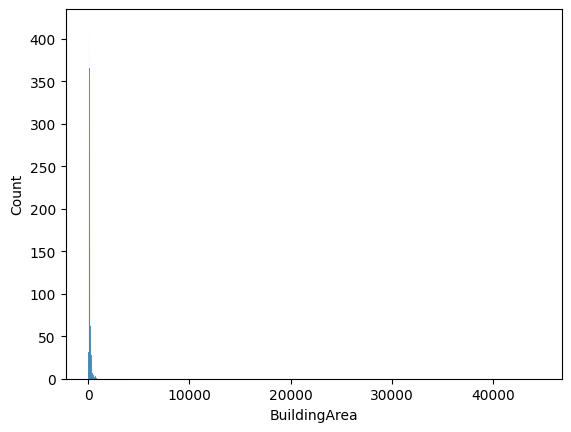

In [83]:
sns.histplot(train, x='BuildingArea')
plt.show()

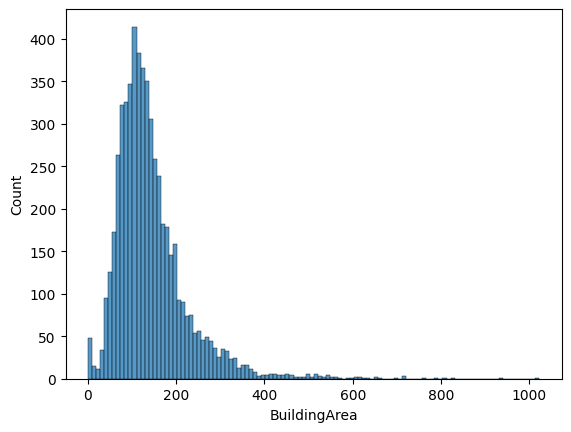

In [84]:
sns.histplot(train_clipped, x='BuildingArea')
plt.show()

Cyclic Values

In [85]:
train['Date']

2004     25/02/2017
143       4/02/2016
12410     3/09/2017
1171      4/06/2016
11285    15/07/2017
            ...    
13429    26/08/2017
10279    27/05/2017
4396      4/03/2017
3309     22/05/2016
2781     10/12/2016
Name: Date, Length: 10864, dtype: object

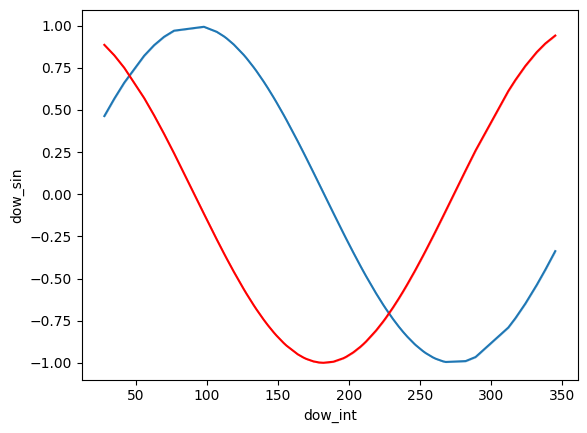

In [86]:
train['date_formatted'] = pd.to_datetime(train['Date'], format='%d/%m/%Y')
train['dow_int'] = train['date_formatted'].dt.dayofyear
train['dow_sin'] = np.sin(train['dow_int'] * (2 * np.pi / 365))
train['dow_cos'] = np.cos(train['dow_int'] * (2 * np.pi / 365))
sns.lineplot(train, x='dow_int', y='dow_sin')
sns.lineplot(train, x='dow_int', y='dow_cos', color='red')
plt.show()

Combining Features

In [87]:
train['rooms_per_building_area'] = train['Rooms']/train['BuildingArea']
train['rooms_per_building_area']

2004          NaN
143      0.016000
12410    0.021739
1171          NaN
11285    0.031250
           ...   
13429    0.012397
10279    0.027397
4396          NaN
3309     0.166667
2781          NaN
Name: rooms_per_building_area, Length: 10864, dtype: float64

Polynomial Features

In [88]:
poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(train[['Price', 'BuildingArea']].fillna(0))
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(), index=train.index)
poly_df.head()

,Price,BuildingArea,Price^2,Price BuildingArea,BuildingArea^2,Price^3,Price^2 BuildingArea,Price BuildingArea^2,BuildingArea^3
2004,845000.0,0.0,7.140250e+11,0.0,0.0,6.033511e+17,0.000000e+00,0.000000e+00,0.0
143,720000.0,125.0,5.184000e+11,90000000.0,15625.0,3.732480e+17,6.480000e+13,1.125000e+10,1953125.0
12410,705000.0,138.0,4.970250e+11,97290000.0,19044.0,3.504026e+17,6.858945e+13,1.342602e+10,2628072.0
1171,980000.0,0.0,9.604000e+11,0.0,0.0,9.411920e+17,0.000000e+00,0.000000e+00,0.0
11285,1070000.0,96.0,1.144900e+12,102720000.0,9216.0,1.225043e+18,1.099104e+14,9.861120e+09,884736.0


Scaling Data

Min-Max Scaling

In [89]:
X_num = train[['Price', 'BuildingArea', 'Rooms']]
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
X_num_min_max_scaled = min_max_scaler.fit_transform(X_num)
min_max_df = pd.DataFrame(X_num_min_max_scaled, columns=min_max_scaler.get_feature_names_out(), index=X_num.index)
min_max_df

,Price,BuildingArea,Rooms
2004,-0.807960,NaN,-0.428571
143,-0.839545,-0.994384,-0.714286
12410,-0.843335,-0.993800,-0.428571
1171,-0.773847,NaN,-0.714286
11285,-0.751105,-0.995687,-0.428571
...,...,...,...
13429,-0.729627,-0.989127,-0.428571
10279,-0.849653,-0.996720,-0.714286
4396,-0.684144,NaN,-0.428571
3309,-0.858181,-0.999191,-0.428571


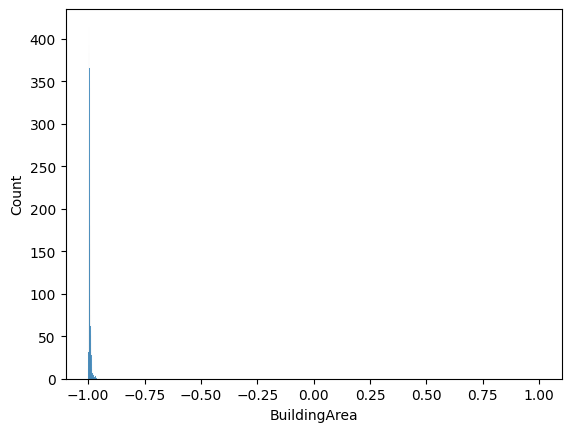

In [90]:
sns.histplot(min_max_df, x='BuildingArea')
plt.show()

Standardization

In [91]:
std_scaler = StandardScaler()
X_num_std_scaled = std_scaler.fit_transform(X_num)
stand_df = pd.DataFrame(X_num_std_scaled, columns=std_scaler.get_feature_names_out(), index=X_num.index)
stand_df

,Price,BuildingArea,Rooms
2004,-0.361223,NaN,0.066285
143,-0.556450,-0.047608,-0.977368
12410,-0.579877,-0.026065,0.066285
1171,-0.150378,NaN,-0.977368
11285,-0.009815,-0.095667,0.066285
...,...,...,...
13429,0.122939,0.146285,0.066285
10279,-0.618923,-0.133783,-0.977368
4396,0.404066,NaN,0.066285
3309,-0.671634,-0.224929,0.066285


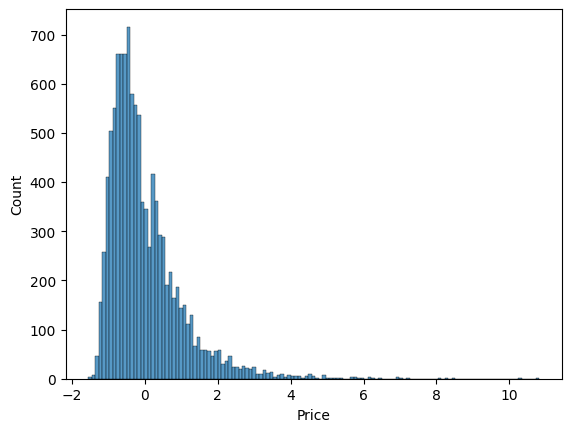

In [92]:
sns.histplot(stand_df, x='Price')
plt.show()

Putting it in a Pipeline

In [93]:


num_attribs = ['Price', 'BuildingArea']
cat_attribs = ["CouncilArea"]
cut_attrib = ['Rooms']


class CutTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bins, labels):  # no *args or **kwargs!
        self.bins = bins
        self.labels = labels

    def fit(self, X, y=None):
        self.feature_names = [X.columns[0]]
        return self

    def get_feature_names_out(self, feature_names_out):
        return self.feature_names

    def transform(self, X):
        return pd.DataFrame(pd.cut(X.iloc[:, 0], bins=self.bins, labels=self.labels).astype(str))



num_pipeline = Pipeline([

    ("impute", SimpleImputer(strategy="median")),

    ("standardize", StandardScaler()),

])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False))

cut_pipeline = Pipeline([('cut', CutTransformer(
    bins=[0, 2, 4, 10], labels=['small', 'medium', 'large']))])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
    ('cut', cut_pipeline, cut_attrib)
])

trans_data = preprocessing.fit_transform(train)
pd.DataFrame(
    trans_data, columns=preprocessing.get_feature_names_out(), index=train.index)

,num__Price,num__BuildingArea,cat__CouncilArea_Banyule,cat__CouncilArea_Bayside,cat__CouncilArea_Boroondara,cat__CouncilArea_Brimbank,cat__CouncilArea_Cardinia,cat__CouncilArea_Casey,cat__CouncilArea_Darebin,cat__CouncilArea_Frankston,...,cat__CouncilArea_Nillumbik,cat__CouncilArea_Port Phillip,cat__CouncilArea_Stonnington,cat__CouncilArea_Unavailable,cat__CouncilArea_Whitehorse,cat__CouncilArea_Whittlesea,cat__CouncilArea_Wyndham,cat__CouncilArea_Yarra,cat__CouncilArea_Yarra Ranges,cut__Rooms
2004,-0.361223,-0.033183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
143,-0.55645,-0.035475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,small
12410,-0.579877,-0.005672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
1171,-0.150378,-0.033183,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,small
11285,-0.009815,-0.10196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13429,0.122939,0.232755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
10279,-0.618923,-0.154689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small
4396,0.404066,-0.033183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
3309,-0.671634,-0.28078,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium


Custom Function Transformer

In [94]:
date_transformer = FunctionTransformer(lambda X:pd.DataFrame(pd.to_datetime(X.loc[:,'Date'], format='%d/%m/%Y').dt.day_of_year))
test = date_transformer.fit_transform(train)
test

,Date
2004,56
143,35
12410,246
1171,156
11285,196
...,...
13429,238
10279,147
4396,63
3309,143
